In [2]:
### import libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib  
import seaborn as sns

plt.style.use("ggplot")

%matplotlib inline  
matplotlib.rcParams["figure.figsize"] = ( 12 , 8 ) ### adjust figure size

In [3]:
## read the data
df = pd.read_csv("movies.csv")
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
### lets see is their any missing data or not 

df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [5]:
#### let's describe the data set 

df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [6]:
### get a basic information about the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [7]:
df.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [8]:
## fill the na in the budget column
df["budget"].fillna(df["budget"].mean() , inplace=True)
df.isna().sum()

/var/folders/q7/z40fzx_10817pm521h9jd29h0000gn/T/ipykernel_14913/3429367091.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["budget"].fillna(df["budget"].mean() , inplace=True)


name          0
rating       77
genre         0
year          0
released      2
score         3
votes         3
director      0
writer        3
star          1
country       3
budget        0
gross       189
company      17
runtime       4
dtype: int64

In [9]:
## fill the na in the rating column with categorical values 
df["rating"].fillna(df["rating"].mode()[0] , inplace=True)
df.isna().sum()

/var/folders/q7/z40fzx_10817pm521h9jd29h0000gn/T/ipykernel_14913/1938860322.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rating"].fillna(df["rating"].mode()[0] , inplace=True)


name          0
rating        0
genre         0
year          0
released      2
score         3
votes         3
director      0
writer        3
star          1
country       3
budget        0
gross       189
company      17
runtime       4
dtype: int64

In [10]:
### fill the na in the gross column
df["gross"].fillna(df["gross"].mean() , inplace=True)
df.isna().sum()

/var/folders/q7/z40fzx_10817pm521h9jd29h0000gn/T/ipykernel_14913/3535320220.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["gross"].fillna(df["gross"].mean() , inplace=True)


name         0
rating       0
genre        0
year         0
released     2
score        3
votes        3
director     0
writer       3
star         1
country      3
budget       0
gross        0
company     17
runtime      4
dtype: int64

In [11]:
### fill the na in the copany column 
df["company"].fillna(df["company"].mode()[0] , inplace=True)
df.isna().sum()

/var/folders/q7/z40fzx_10817pm521h9jd29h0000gn/T/ipykernel_14913/794068569.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["company"].fillna(df["company"].mode()[0] , inplace=True)


name        0
rating      0
genre       0
year        0
released    2
score       3
votes       3
director    0
writer      3
star        1
country     3
budget      0
gross       0
company     0
runtime     4
dtype: int64

In [12]:
### drop the NA values
df.dropna(inplace=True)
df.isna().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [13]:
df.shape

(7656, 15)

In [14]:
df["Year"] = df["released"].astype(str).str.split(",").str[1].str[:5]
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,1.900000e+07,4.699877e+07,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4.500000e+06,5.885311e+07,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,1.800000e+07,5.383751e+08,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3.500000e+06,8.345354e+07,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6.000000e+06,3.984634e+07,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7659,I Am Fear,Not Rated,Horror,2020,"March 3, 2020 (United States)",3.4,447.0,Kevin Shulman,Kevin Shulman,Kristina Klebe,United States,3.558988e+07,1.326600e+04,Roxwell Films,87.0,2020
7660,Aloha Surf Hotel,R,Comedy,2020,"November 5, 2020 (United States)",7.1,14.0,Stefan C. Schaefer,Stefan C. Schaefer,Augie Tulba,United States,3.558988e+07,7.850054e+07,Abominable Pictures,90.0,2020
7663,More to Life,R,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7.000000e+03,7.850054e+07,Universal Pictures,90.0,2020
7664,Dream Round,R,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,3.558988e+07,7.850054e+07,Cactus Blue Entertainment,90.0,2020


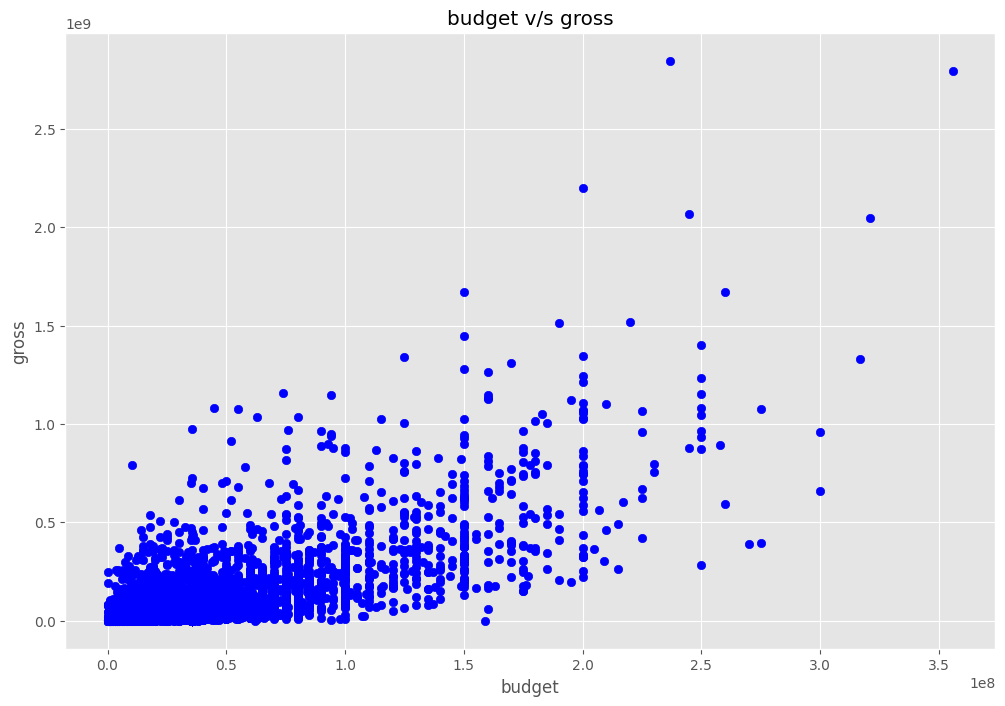

In [15]:
### now lets draw the scatter plot for the better understanding becoz i think budget has the higher correlection with the gross

plt.scatter(df.budget , df.gross , c="blue")
plt.title("budget v/s gross")
plt.xlabel("budget")
plt.ylabel("gross")
plt.show()

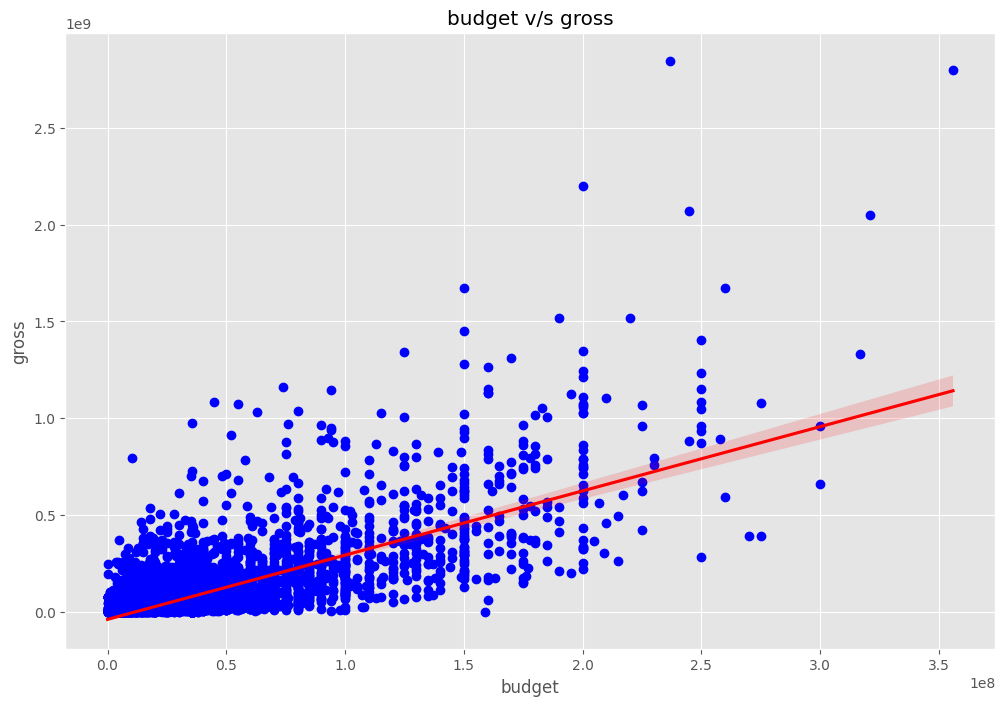

In [16]:
### put the linear lines on the plot in seaborn format

sns.regplot(x="budget" , y="gross" , data=df , scatter_kws={"color" : "blue" , "alpha" : 1.0} , line_kws={"color" : "red"})
plt.title("budget v/s gross")
plt.xlabel("budget")
plt.ylabel("gross")
plt.show()


In [17]:
## from the above chart we can identify that the budget has the highest correlection with the gross 

In [18]:
### now lets find out other colummns which has a better correlection with the gross by using a heatmap 
### for making a better correlection we have to change the columns which contains string to floating values 

In [19]:
#### loop though the columns and change the datatype to category
categoryColList = []
for col in df.columns:
    if df[col].dtype == "object":
        categoryColList.append(col)
        df[col] = df[col].astype("category")
        df[col] = df[col].cat.codes

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
0,6577,6,6,1980,1701,8.4,927000.0,2585,4008,1043,54,19000000.0,46998772.0,2312,146.0,0
1,5566,6,1,1980,1488,5.8,65000.0,2266,1630,325,55,4500000.0,58853106.0,727,104.0,0
2,5135,4,0,1980,1767,8.7,1200000.0,1111,2564,1741,55,18000000.0,538375067.0,1533,124.0,0
3,286,4,4,1980,1488,7.7,221000.0,1300,1997,2240,55,3500000.0,83453539.0,1805,88.0,0
4,1027,6,4,1980,1539,7.3,108000.0,1054,520,408,55,6000000.0,39846344.0,1770,98.0,0


In [20]:
## find out the correlection 
df.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
name,1.000000,-0.012804,0.014866,0.011448,-0.010253,0.016921,0.013214,0.009271,0.009960,0.006279,-0.010447,0.020508,0.005579,0.010521,0.010751,0.010333
rating,-0.012804,1.000000,0.121159,0.027231,0.023793,0.013377,0.012956,0.016205,-0.003843,0.005280,0.028087,-0.156430,-0.130648,-0.079046,0.067662,0.026703
genre,0.014866,0.121159,1.000000,-0.083817,0.030434,0.039608,-0.150220,-0.016137,0.005632,-0.004790,-0.037510,-0.315721,-0.237830,-0.072232,-0.044900,-0.083844
year,0.011448,0.027231,-0.083817,1.000000,-0.001070,0.099012,0.223453,-0.021091,-0.007510,-0.026888,-0.070225,0.267022,0.252383,-0.011771,0.120572,0.993176
released,-0.010253,0.023793,0.030434,-0.001070,1.000000,0.042626,0.015881,-0.001397,-0.002391,0.016726,-0.021784,0.012473,0.001355,-0.009078,0.000328,-0.003470
score,0.016921,0.013377,0.039608,0.099012,0.042626,1.000000,0.409496,0.009224,0.019470,-0.001244,-0.133796,0.064718,0.182919,-0.003958,0.400459,0.105898
votes,0.013214,0.012956,-0.150220,0.223453,0.015881,0.409496,1.000000,0.000542,0.000801,-0.019333,0.073399,0.421014,0.628821,0.130360,0.309123,0.220554
director,0.009271,0.016205,-0.016137,-0.021091,-0.001397,0.009224,0.000542,1.000000,0.299175,0.039676,0.019031,-0.010162,-0.014430,0.005020,0.018167,-0.019078
writer,0.009960,-0.003843,0.005632,-0.007510,-0.002391,0.019470,0.000801,0.299175,1.000000,0.027599,0.015554,-0.033414,-0.023146,0.003290,-0.002951,-0.005513
star,0.006279,0.005280,-0.004790,-0.026888,0.016726,-0.001244,-0.019333,0.039676,0.027599,1.000000,-0.014707,-0.017227,-0.002543,0.009106,0.009193,-0.024753


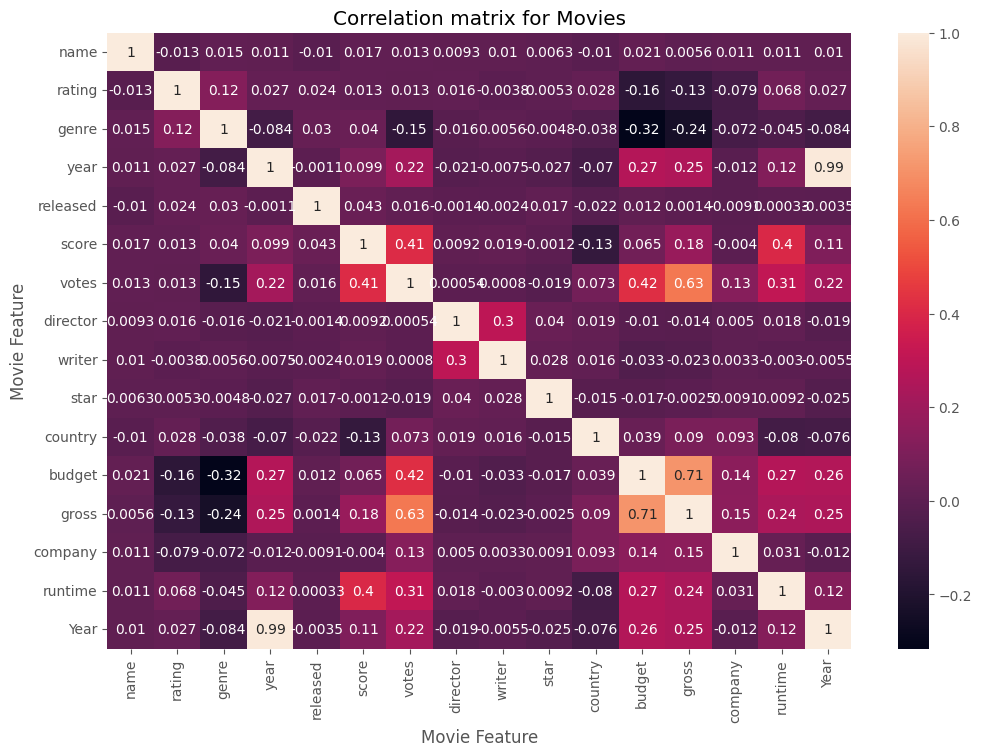

In [21]:
### lets display this correcltion values to the heatmap 

sns.heatmap(df.corr() , annot=True)
plt.title("Correlation matrix for Movies")
plt.xlabel("Movie Feature")
plt.ylabel("Movie Feature")
plt.show()

In [22]:
### from the above chart we can identify that the values which are above the 0.5 percentile and in a lighter color are more likely to be correlated with the gross 


In [23]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()
corr_pairs = correlation_mat.unstack()
print(corr_pairs)

name  name        1.000000
      rating      0.146439
      genre       0.037537
      year        0.965646
      released    0.959719
                    ...   
Year  budget      0.283455
      gross       0.838419
      company     0.493820
      runtime     0.045731
      Year        1.000000
Length: 256, dtype: float64


In [24]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

company  budget    -0.087818
budget   company   -0.087818
genre    rating    -0.087472
rating   genre     -0.087472
country  budget    -0.068669
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
runtime  runtime    1.000000
Year     Year       1.000000
Length: 256, dtype: float64


In [25]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

company   star       0.527221
star      company    0.527221
company   writer     0.547730
writer    company    0.547730
director  company    0.551841
                       ...   
year      year       1.000000
genre     genre      1.000000
rating    rating     1.000000
runtime   runtime    1.000000
Year      Year       1.000000
Length: 86, dtype: float64


In [26]:
### looking at the top 15 compaines with their revenue

companyGrossSum = df.groupby("company")[["gross"]].sum() 
companyGrossSum = companyGrossSum.sort_values(by="gross" , ascending=False)[:15]
companyGrossSum = companyGrossSum["gross"].astype("int64")
companyGrossSum

company
2312    56569922347
2274    52873669233
727     43008941346
1805    40572107956
2246    40257053857
2309    36327887792
1706    19883797684
1599    15065592411
882     11873612858
2225    11795832638
884     11635441081
1630     9387231187
2140     8373718838
1849     7886344526
1103     7443502667
Name: gross, dtype: int64

In [27]:
df["budget"] = df["budget"].astype("int64")
df["gross"] = df["gross"].astype("int64")
df 

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
0,6577,6,6,1980,1701,8.4,927000.0,2585,4008,1043,54,19000000,46998772,2312,146.0,0
1,5566,6,1,1980,1488,5.8,65000.0,2266,1630,325,55,4500000,58853106,727,104.0,0
2,5135,4,0,1980,1767,8.7,1200000.0,1111,2564,1741,55,18000000,538375067,1533,124.0,0
3,286,4,4,1980,1488,7.7,221000.0,1300,1997,2240,55,3500000,83453539,1805,88.0,0
4,1027,6,4,1980,1539,7.3,108000.0,1054,520,408,55,6000000,39846344,1770,98.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7659,2651,3,9,2020,2140,3.4,447.0,1609,2463,1530,55,35589876,13266,1985,87.0,40
7660,338,6,4,2020,2756,7.1,14.0,2587,3985,194,55,35589876,78500541,83,90.0,40
7663,3701,6,6,2020,2957,3.1,18.0,1499,2286,2415,55,7000,78500541,2274,90.0,40
7664,1677,6,4,2020,1103,4.7,36.0,774,2611,1882,55,35589876,78500541,535,90.0,40
